In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [1]:
houst = pd.read_csv('data/HOUST.csv')
houst.set_index('DATE', inplace=True)

NameError: name 'pd' is not defined

In [82]:
houst

,HOUST
DATE,
1/1/1959,1657
1/2/1959,1667
1/3/1959,1620
1/4/1959,1590
1/5/1959,1498
...,...
1/8/2023,1305
1/9/2023,1356
1/10/2023,1376


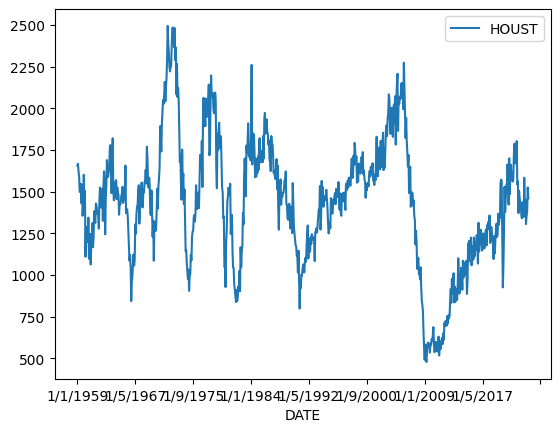

In [83]:
houst.plot()
pyplot.show()

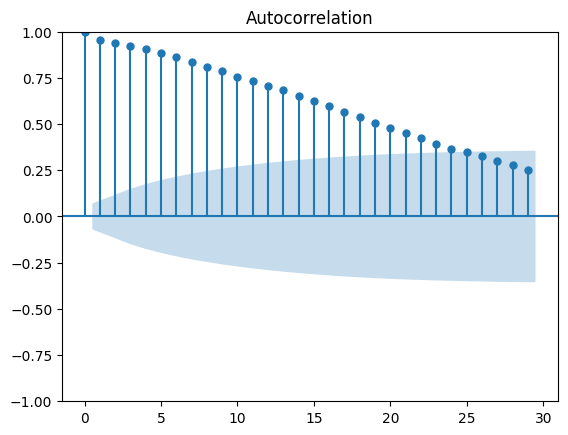

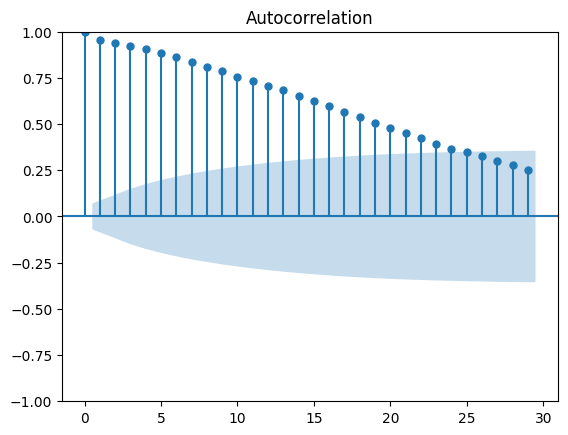

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(houst.HOUST)

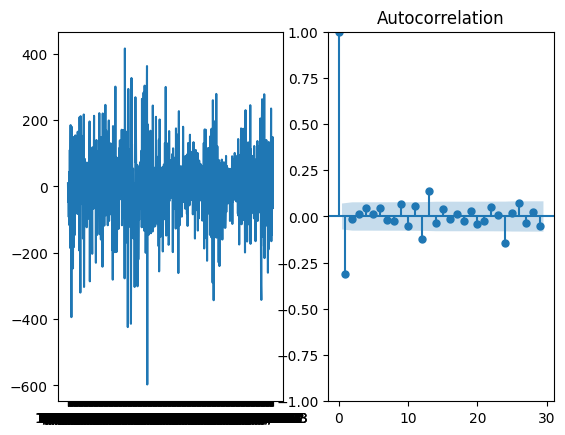

In [85]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.plot(houst.HOUST.diff())

ax2 = f.add_subplot(122)
plot_acf(houst.HOUST.diff().dropna(), ax=ax2)
plt.show()

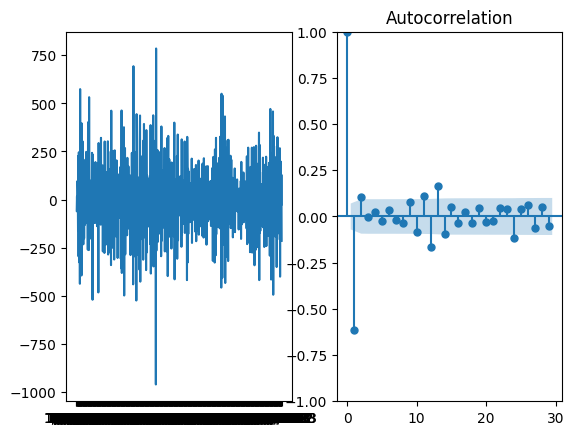

In [86]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.plot(houst.HOUST.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(houst.HOUST.diff().diff().dropna(), ax=ax2)
plt.show()

In [87]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(houst.HOUST.dropna())
print(f"p-value: {result[1]}")

result = adfuller(houst.HOUST.diff().dropna())
print(f"p-value: {result[1]}")

result = adfuller(houst.HOUST.diff().diff().dropna())
print(f"p-value: {result[1]}")

p-value: 0.0028826580293683057
p-value: 2.4827832192593595e-10
p-value: 4.293943021057209e-23


In [88]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(houst.HOUST, order = (1,1,1))
model_fit = arima_model.fit()


C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

Test RMSE 75.7220658841236


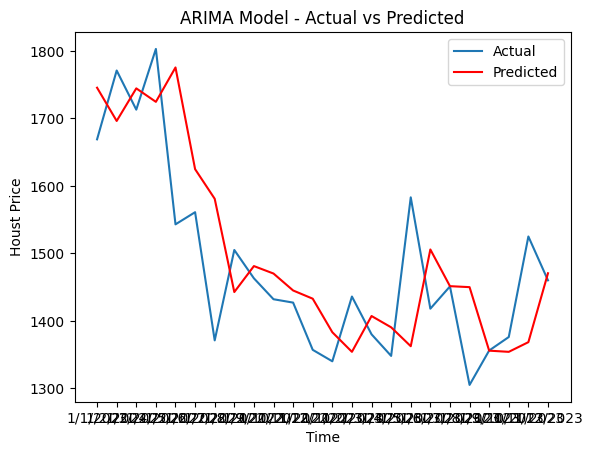

In [89]:
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame named houst
# Example DataFrame
# houst = ...

train, test = houst[:-24], houst[-24:]
history = [x for x in train.HOUST]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.HOUST[t]
    history.append(obs)

mae = mean_absolute_error(test.HOUST, predictions)
print(f"Test RMSE {mae}")

# Plotting with labels
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.xlabel('Time')
pyplot.ylabel('Houst Price')
pyplot.title('ARIMA Model - Actual vs Predicted')
pyplot.legend()
pyplot.show()


In [90]:
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame named houst
# Example DataFrame
# houst = ...

history = [x for x in houst.HOUST]
predictions = list()

for t in range(6):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)

In [91]:
predictions

[1465.5821157806129,
 1465.3857445386873,
 1465.3926524584238,
 1465.392409444392,
 1465.3924180096221,
 1465.3924177149129]

## xgboost

In [2]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from stldecompose import decompose

# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

ImportError: cannot import name '_maybe_get_pandas_wrapper_freq' from 'statsmodels.tsa.filters._utils' (C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\filters\_utils.py)

In [107]:
pip install stldecompose

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\uifan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [93]:
model = XGBRegressor()

In [94]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [95]:

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, 1], predictions

In [96]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
 return data[:-n_test, :], data[-n_test:, :]

In [97]:

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

>expected=1340.0, predicted=1192.6
>expected=1436.0, predicted=1350.1
>expected=1380.0, predicted=1470.4
>expected=1348.0, predicted=1519.1
>expected=1583.0, predicted=1047.6
>expected=1418.0, predicted=1528.4
>expected=1451.0, predicted=1484.8
>expected=1305.0, predicted=1751.5
>expected=1356.0, predicted=1318.9
>expected=1376.0, predicted=1266.2
>expected=1525.0, predicted=1532.5
>expected=1460.0, predicted=1583.6
MAE: 158.237


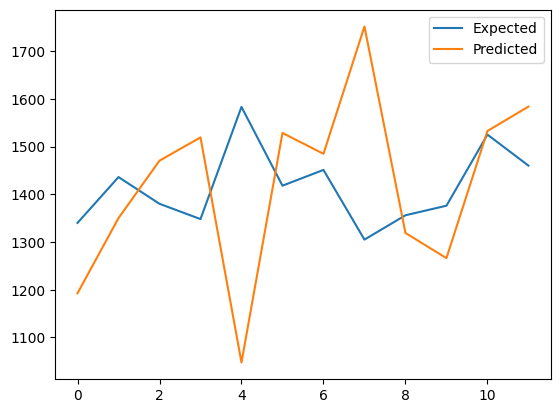

In [98]:

# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
            # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
        # put it all together
            agg = concat(cols, axis=1)
        # drop rows with NaN values
            if dropnan:
                agg.dropna(inplace=True)
    return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

# load the dataset

values = houst.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=1)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [99]:
houst.values

array([[1657],
       [1667],
       [1620],
       [1590],
       [1498],
       [1503],
       [1547],
       [1430],
       [1540],
       [1355],
       [1416],
       [1601],
       [1460],
       [1503],
       [1109],
       [1289],
       [1271],
       [1247],
       [1197],
       [1344],
       [1097],
       [1246],
       [1246],
       [1063],
       [1183],
       [1226],
       [1312],
       [1166],
       [1228],
       [1382],
       [1335],
       [1312],
       [1429],
       [1415],
       [1385],
       [1365],
       [1361],
       [1278],
       [1443],
       [1524],
       [1483],
       [1404],
       [1450],
       [1517],
       [1324],
       [1533],
       [1622],
       [1564],
       [1244],
       [1456],
       [1534],
       [1689],
       [1641],
       [1588],
       [1614],
       [1639],
       [1763],
       [1779],
       [1622],
       [1491],
       [1603],
       [1820],
       [1517],
       [1448],
       [1467],
       [1550],
       [15

In [100]:
# finalize model and make a prediction for monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            # put it all together
            agg = concat(cols, axis=1)
            # drop rows with NaN values
            if dropnan:
                agg.dropna(inplace=True)
    return agg.values

# load the dataset

values = houst.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=1)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new preduction
row = values[-1:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

Input: [1460], Predicted: 1579.290


In [101]:
predictions = list()

history = [x for x in houst.values]
# step over each time-step in the test set
for i in range(12):
    # split test row into input and output columns
    # fit model on history and make a prediction
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(history, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([history[-1]]))
    # store forecast in list of predictions
    predictions.append(yhat)
    # add actual observation to history for the next loop
    history.append(yhat)
    
    # summarize progress



XGBoostError: [18:44:53] C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:792: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?

array([[1657.],
       [1667.],
       [1620.],
       [1590.],
       [1498.],
       [1503.],
       [1547.],
       [1430.],
       [1540.],
       [1355.],
       [1416.],
       [1601.],
       [1460.],
       [1503.],
       [1109.],
       [1289.],
       [1271.],
       [1247.],
       [1197.],
       [1344.],
       [1097.],
       [1246.],
       [1246.],
       [1063.],
       [1183.],
       [1226.],
       [1312.],
       [1166.],
       [1228.],
       [1382.],
       [1335.],
       [1312.],
       [1429.],
       [1415.],
       [1385.],
       [1365.],
       [1361.],
       [1278.],
       [1443.],
       [1524.],
       [1483.],
       [1404.],
       [1450.],
       [1517.],
       [1324.],
       [1533.],
       [1622.],
       [1564.],
       [1244.],
       [1456.],
       [1534.],
       [1689.],
       [1641.],
       [1588.],
       [1614.],
       [1639.],
       [1763.],
       [1779.],
       [1622.],
       [1491.],
       [1603.],
       [1820.],
       [